In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the BED file into a DataFrame
bed_dataframe = pd.read_csv('mapped.bed', sep='\t', header=None)

# Compute midpoints of relevant intervals
query_midpoint = (bed_dataframe[2] + bed_dataframe[3]) // 2
target_midpoint = (bed_dataframe[8] + bed_dataframe[9]) // 2

# Calculate offset and target length
bed_dataframe['offset'] = target_midpoint - query_midpoint
bed_dataframe['target_length'] = bed_dataframe[9] - bed_dataframe[8]

# Group by offset and length, then count frequencies
frequency_table = (
    bed_dataframe.groupby(['offset', 'target_length'])
    .size()
    .reset_index(name='count')
)

# Extract data for plotting or further analysis
X = frequency_table['offset'].to_numpy()
Y = frequency_table['target_length'].to_numpy()
Z = frequency_table['count'].to_numpy()


In [44]:
# Unique sorted values
xu = sorted(set(X))
yu = sorted(set(Y))

# Index maps
xi = {val: idx for idx, val in enumerate(xu)}
yi = {val: idx for idx, val in enumerate(yu)}

# Heatmap matrix
hm = np.zeros((len(yu), len(xu)))

# Fill heatmap
for x, y, z in zip(X, Y, Z):
    if x in xi and y in yi:
        hm[yi[y], xi[x]] = z


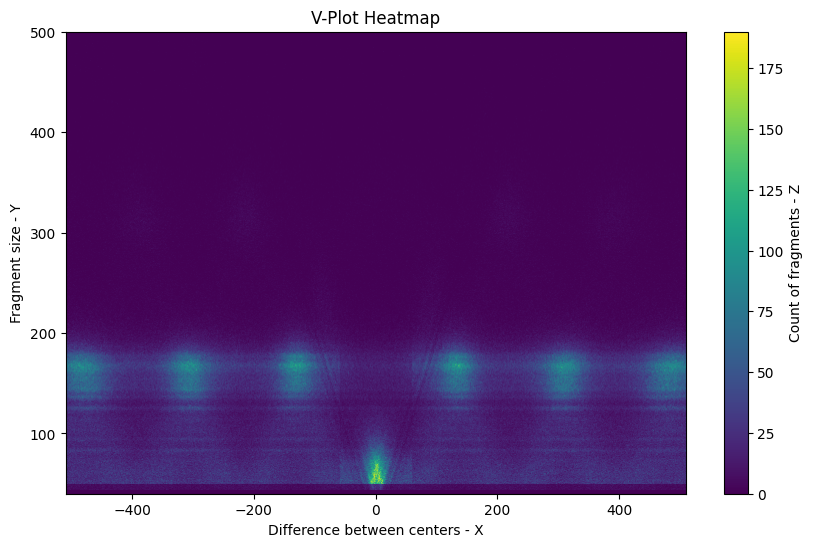

In [45]:
plt.figure(figsize=(10, 6))
plt.imshow(
    hm,
    aspect='auto',
    cmap='viridis',
    origin='lower',
    extent=[min(xu), max(xu), min(yu), max(yu)]
)
plt.title('V-Plot Heatmap')
plt.colorbar(label='Count of fragments - Z')
plt.xlabel('Difference between centers - X')
plt.ylabel('Fragment size - Y')
plt.show()
